<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2025a/blob/main/Week_02/Week_02_Lab_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 02 Lab: Linear models
This notebook was developed using methodologies suggested by ChatGPT (OpenAI, 2025)

# –§—Ä–æ–ª–æ–≤–∞ –ê.–ò. –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è ‚Ññ2

# Intro

In this lab, we will learn how **linear models** work by starting from scratch.

- First, we will use **NumPy** to manually implement gradient descent for **linear regression**.
- Then, we will progressively use **PyTorch** and later **PyTorch Lightning** to make our life easier.
- Finally, we will extend from **linear regression** to **logistic regression** for classification.

---


# Block 1: Gradient descent implemented manually
**Goal:** Fit a line `y = wx + b` to some toy data using gradient descent, without any ML libraries.  
We will:
1. Create toy data `(X, Y)`.
2. Define a prediction function.
3. Define Mean Squared Error (MSE) loss.
4. Compute gradients **manually**.
5. Update parameters step by step.
6. Visualize the results.

This shows how training actually works under the hood.

## Step 1: Generate Date

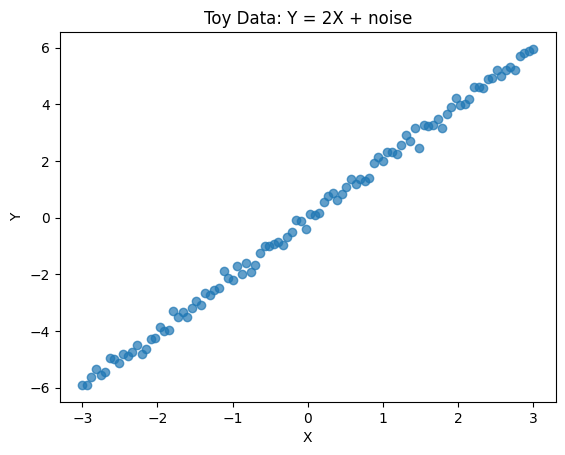

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# –ó–¥–µ—Å—å –º—ã –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–∏—Ç–∏—Ä—É—é—Ç –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
# Set random seed for reproducibility
np.random.seed(42)

# Generate toy data: Y = 2*X + noise
X = np.linspace(-3, 3, 100)
noise = np.random.randn(100) * 0.2
Y = 2 * X + noise

# Visualize data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data: Y = 2X + noise")
plt.show()

## Step 2, 3: Initialize Model Parameters and the model itself

In [140]:
# Initialize parameters randomly
w = np.random.randn()
b = np.random.randn()

print("Initial parameters: w =", w, "b =", b)


Initial parameters: w = -1.4153707420504142 b = -0.42064532276535904


In [143]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫ –¥–∞–Ω–Ω—ã—Ö
def predict(x, w, b):
    """Linear model prediction: y = wx + b"""
    return w * x + b

# Test prediction
print("Prediction for x=1.0:", predict(1.0, w, b))


Prediction for x=1.0: -1.8360160648157733


## Step 4: Define Objective (MSE)

In [144]:
def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    # –í—ã—á–∏—Å–ª—è–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ —Ä–∞–∑–Ω–æ—Å—Ç–µ–π –º–µ–∂–¥—É —Ä–µ–∞–ª—å–Ω—ã–º–∏ (y_true) –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ (y_pred) –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
    loss = ((y_true - y_pred)**2).mean()
    return loss
# MSE - —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞
y_pred_test = predict(X, w, b)

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ y
print("Initial loss:", mse_loss(Y, y_pred_test))


Initial loss: 35.989910266025966


## Step 5: Compute Gradient

In [145]:
# –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ –æ—à–∏–±–∫–∏
def compute_gradients(x, y_true, y_pred):
    """Compute gradients of loss wrt w and b"""
    N = len(x)
    error = y_true - y_pred
    # implement gradients
    dw = (-2/N)*np.dot(X.T, error)
    # db = 0
    db = (-2/N)*np.sum(error)
    return dw, db



## Step 6: Training Loop

Epoch 10/50, Loss: 11.6270, w=0.19, b=-0.35
Epoch 20/50, Loss: 3.3533, w=1.04, b=-0.29
Epoch 30/50, Loss: 1.0000, w=1.49, b=-0.24
Epoch 40/50, Loss: 0.3252, w=1.73, b=-0.20
Epoch 50/50, Loss: 0.1280, w=1.86, b=-0.17


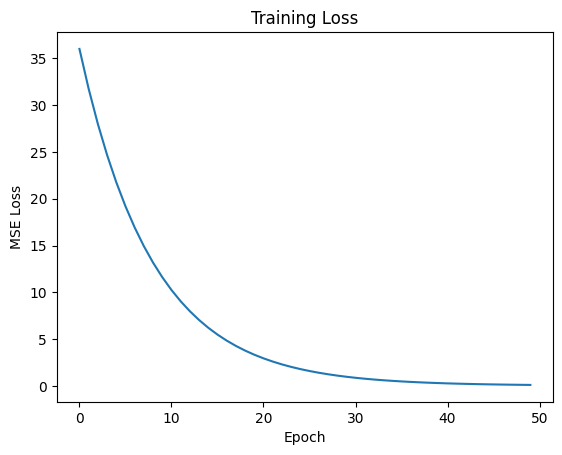

In [146]:
# Hyperparameters
lr = 0.01   # learning rate
epochs = 50 # —á–µ–º –±–æ–ª—å—à–µ –±—É–¥–µ—Ç —Ü–∏–∫–ª–æ–≤, —Ç–µ–º –±–ª–∏–∂–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∫ –∏—Å—Ç–∏–Ω–µ

loss_history = []

for epoch in range(epochs):
    # Forward pass: prediction
    y_pred = predict(X, w, b)

    # Compute loss
    loss = mse_loss(Y, y_pred)
    loss_history.append(loss)

    # Backward pass: gradients
    dw, db = compute_gradients(X, Y, y_pred)

    # Parameter update
    # update w and b using dw, db and learning rate (—Å–∫–æ—Ä–æ—Å—Ç—å)
    w = w - lr * dw  # –ù—É–∂–Ω–æ –í–´–ß–ò–¢–ê–¢–¨ –≥—Ä–∞–¥–∏–µ–Ω—Ç!
    b = b - lr * db

    # Print progress every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, w={w:.2f}, b={b:.2f}")

# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()

#


## Step 7: Visualization

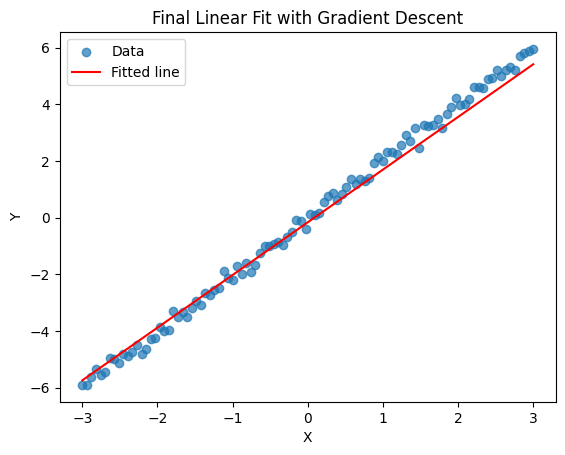

In [147]:
plt.scatter(X, Y, alpha=0.7, label="Data")
plt.plot(X, predict(X, w, b), color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Final Linear Fit with Gradient Descent")
plt.legend()
plt.show()


# Block 2: Gradient Descent Implemented with Pytorch



## Step 1: Imports and Data

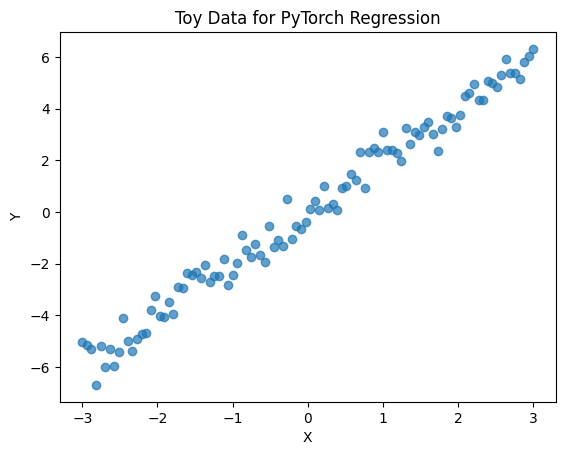

In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate toy data again (same as Block 1)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).view(-1, 1)   # shape (100,1)
Y = 2 * X + torch.randn(100, 1) * 0.5

# Visualize
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data for PyTorch Regression")
plt.show()


## Step 2: Define Model

In [95]:
# Define a simple linear model: y = wx + b
# replace with nn.Linear(input dim, output dim)
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–¥–Ω—ã—Ö –∏ –≤—ã—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# !!!! –í–û–ü–†–û–° - –Ω–µ —Å–æ–≤—Å–µ–º –ø–æ–Ω–∏–º–∞—é –ø—Ä–æ bias!!!!
# y = w*x + b
model = nn.Linear(1, 1)  # add your code here

## Step 3: Define Objective and Optimizer

In [96]:
# Define Mean Squared Error loss
criterion = nn.MSELoss()

# Define optimizer (e.g., SGD)
# use optim.SGD with model parameters and learning rate
optimizer = optim.SGD(model.parameters(), lr=lr)


## Step 4: Training Loop

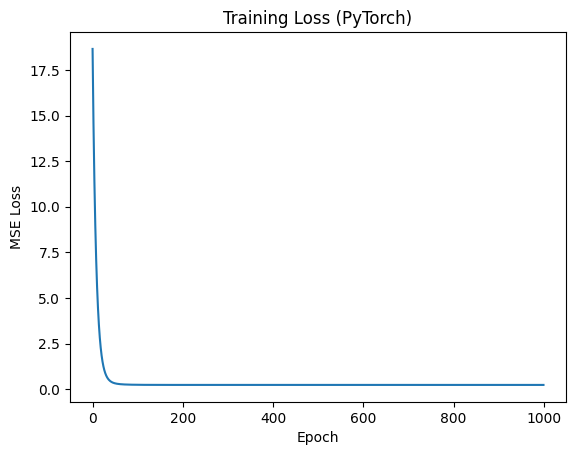

In [97]:
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Forward pass//–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    y_pred = model(X)

    # Compute loss(–æ—à–∏–±–∫—É) - —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å –∏—Å—Ç–∏–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
    loss = criterion(y_pred, Y)
    loss_history.append(loss.item())

    # Backward pass
    optimizer.zero_grad()   # reset gradients
    loss.backward()         # compute gradients
    optimizer.step()        # update weights

    if (epoch+1) % 10 == 0:
        # TODO: print epoch, loss, and model parameters
        pass  # add your code here

# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (PyTorch)")
plt.show()


## Step 5: Visualize Final Fit

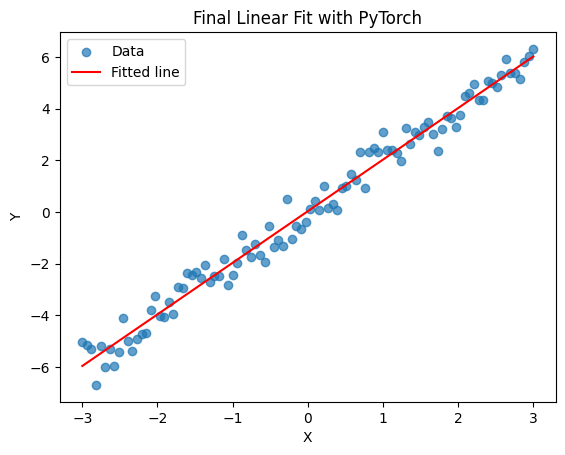

In [98]:
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7, label="Data")
plt.plot(X.numpy(), model(X).detach().numpy(), color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Final Linear Fit with PyTorch")
plt.legend()
plt.show()

# Block 3: Regression model

## Step 1: Generate Data

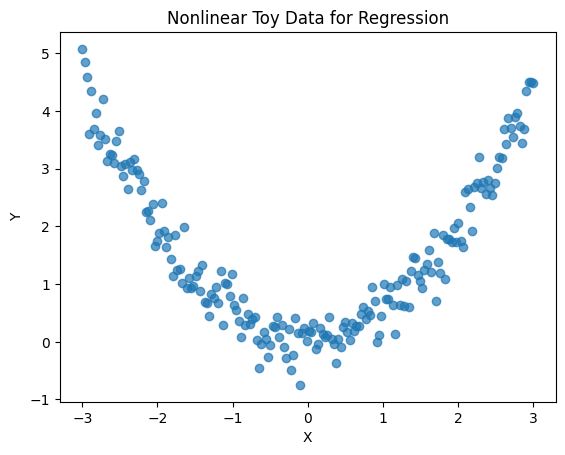

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Generate nonlinear data: y = 0.5 * x^2 + noise
# —Ç–æ—Ç –∂–µ –ø—Ä–∏–Ω—Ü–∏–ø, —á—Ç–æ –∏ —Å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π, –Ω–æ —Ñ—É–Ω–∫—Ü–∏—è —É–∂–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–µ–µ
torch.manual_seed(42)
X = torch.linspace(-3, 3, 200).view(-1, 1)
Y = 0.5 * (X ** 2) + torch.randn(200, 1) * 0.3

# Visualize
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Nonlinear Toy Data for Regression")
plt.show()


## Step 2: Define Dataset and Dataloader

In [109]:
class ToyDataset(Dataset):
    def __init__(self, X, Y):
      self.X = X  # –ø—Ä–∏–∑–Ω–∞–∫–∏
      self.Y = Y  # —Ü–µ–ª–µ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

    def __len__(self):
        # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ samples
        return len(self.X)

    # –ø–æ–ª—É—á–µ–Ω–∏–µ –æ–¥–Ω–æ–≥–æ sample:
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]  # (–ø—Ä–∏–∑–Ω–∞–∫–∏, target)

# Create dataset and dataloader
dataset = ToyDataset(X, Y)

# batch_size - —Ä–∞–∑–º–µ—Ä –≥—Ä—É–ø–ø—ã –ø—Ä–∏–º–µ—Ä–æ–≤
# shuffle - –ø–µ—Ä–µ–º–µ—à–µ–Ω–∏–≤–∞–Ω–∏–µ
# –∏—Å–ø–æ–ª—å–∑—É–µ–º –∫–∞—Å—Ç–æ–º–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


## Step 3: Define Model, Objective, Optimizer

In [119]:
# Simple linear model (won‚Äôt be perfect on quadratic data)

# —Å–¥–µ–ª–∞–Ω–æ –ø—Ä–∏ –ø–æ–¥–¥–µ—Ä–∂–∫–µ DeepSeek
# –≤ –ø—Ä–∏–º–µ—Ä–µ, —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω–æ–º –Ω–∞ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π, –±—ã–ª–æ –æ–ø–∏—Å–∞–Ω–æ -
# model = nn.Linear(1,1), –Ω–æ —Ç–∞–∫ –∫–∞–∫ –º–æ–¥–µ–ª—å –Ω–µ–ª–∏–Ω–µ–π–Ω–∞,
# –ø–æ–ø—Ä–æ–±—É–µ–º –æ–ø–∏—Å–∞—Ç—å –≤—Å–µ —Ç–∞–∫, —á—Ç–æ–±—ã –∏ –º–æ–¥–µ–ª—å, –∏ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º–∏
# –æ–±—â–∞—è —Ñ–æ—Ä–º—É–ª–∞ - y_pred = w2 * ReLU(w1*x + b1) + b2
model = nn.Sequential(
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ: 1 –≤—Ö–æ–¥ ‚Üí 10 –≤—ã—Ö–æ–¥–æ–≤
    # z1 = w1*x + b1  # w1: (10, 1), b1: (10,)
    nn.Linear(1, 10),  # —Å–∫—Ä—ã—Ç—ã–π —Å–ª–æ–π
    # –î–æ–±–∞–≤–ª—è–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å - –∫–ª—é—á–µ–≤–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
    # –ö–∞–∂–¥—ã–π ReLU-–Ω–µ–π—Ä–æ–Ω —Å–æ–∑–¥–∞–µ—Ç "–∏–∑–ª–æ–º"
    nn.ReLU(),         # —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ: 10 –≤—Ö–æ–¥–æ–≤ ‚Üí 1 –≤—ã—Ö–æ–¥
    nn.Linear(10, 1)   # –≤—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
)

# MSE loss
criterion = nn.MSELoss()

# Optimizer
# use SGD with lr=0.05
optimizer = optim.SGD(model.parameters(), lr=0.05)


## Step 4: Training Loop

In [120]:
epochs = 50
loss_history = []

for epoch in range(epochs):
    for batch_X, batch_Y in dataloader:
        # Forward pass
        y_pred = model(batch_X)

        # Loss
        loss = criterion(y_pred, batch_Y)
        loss_history.append(loss.item())

        # Backward pass
        # –ó–¥–µ—Å—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –≤—Å–µ, —á—Ç–æ –±—ã–ª–æ –æ–ø–∏—Å–∞–Ω–æ –∫–æ–¥–æ–º –≤ –ø—Ä–∏–º–µ—Ä–∞—Ö –≤—ã—à–µ

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/50, Loss: 0.2122
Epoch 20/50, Loss: 0.0498
Epoch 30/50, Loss: 0.2502
Epoch 40/50, Loss: 0.0972
Epoch 50/50, Loss: 0.1945


## Step 5: Visualization

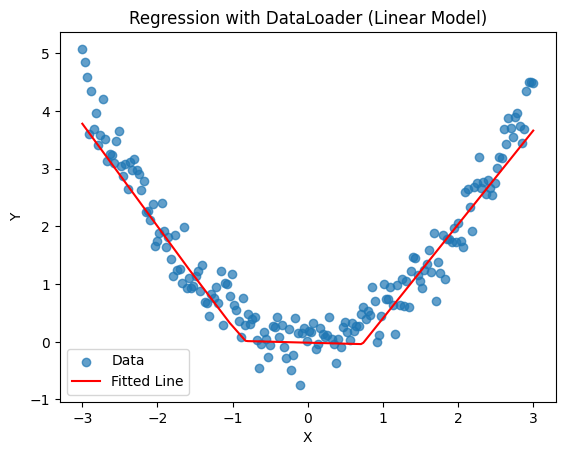

In [122]:
# Plot data
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7, label="Data")

# Model predictions
with torch.no_grad():
    Y_pred = model(X)
plt.plot(X.numpy(), Y_pred.numpy(), color="red", label="Fitted Line")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression with DataLoader (Linear Model)")
plt.legend()
plt.show()


# Block 4: Logistic Regression Model

## Step 1: Install & Imports

In [123]:
!pip install torch torchvision pytorch-lightning -q

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import pytorch_lightning as pl
import matplotlib.pyplot as plt


## Step 2: Dataset and Dataloader

In [124]:
class MNIST37(torch.utils.data.Dataset):
    def __init__(self, train=True, transform=None):
        # load MNIST –æ–±—É—á–∞—é—â–∞—è –∏–ª–∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞
        self.dataset = datasets.MNIST(root="./data", train=train, download=True)

        # filter only 3 and 7
        # –°–æ–∑–¥–∞–µ–º –º–∞—Å–∫—É –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ —Ç–æ–ª—å–∫–æ 3 –∏ 7, –ø—Ä–∏–º–µ–Ω—è–µ–º –µ–µ
        mask = (self.dataset.targets == 3) | (self.dataset.targets == 7)
        self.data = self.dataset.data[mask]
        self.targets = self.dataset.targets[mask]

        # convert labels: 3 -> 0, 7 -> 1 - —Ç–µ–ø–µ—Ä—å –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è
        self.targets = (self.targets == 7).long()

        self.transform = transform

    def __len__(self):
        # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤
        return len(self.data)

    def __getitem__(self, idx):
        # –¥–∞–Ω–Ω—ã–µ - –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        x = self.data[idx]
        # –æ–ø–∏—Å–∞–Ω–Ω–∞—è —Ä–∞–Ω–µ–µ –º–µ—Ç–∫–∞ - 0/1 –∏–ª–∏ 3/7
        y = self.targets[idx]

        if self.transform:
            x = self.transform(x)

        return x, y



In [125]:
transform = transforms.Compose([
    # x.float(): –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∏–∑ uint8 (0-255) –≤ float32
    # 255.0: –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ—Ç –ø–∏–∫—Å–µ–ª–∏ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω [0, 1]
    transforms.Lambda(lambda x: x.float() / 255.0),  # scale and cast –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    # –∏ –∑–∞—Ç–µ–º –Ω—É–∂–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ –≤–µ–∫—Ç–æ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    transforms.Lambda(lambda x: x.view(-1))          # flatten
])

train_dataset = MNIST37(train=True, transform=transform)
test_dataset = MNIST37(train=False, transform=transform)

# batch_size - —Ä–∞–∑–º–µ—Ä –≥—Ä—É–ø–ø—ã –ø—Ä–∏–º–µ—Ä–æ–≤
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

## Step 3: Set Training with Lightning

In [128]:
class LogisticRegressionModel(pl.LightningModule):
    def __init__(self, input_dim=784):
        super().__init__()
        # create linear layer (input_dim -> 1)
        # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—Ö–æ–¥–æ–≤ –≤ –≤—ã—Ö–æ–¥—ã
        self.linear = nn.Linear(input_dim,1)
        # –Ω–µ —Å–æ–≤—Å–µ–º –ø–æ–Ω–∏–º–∞—é –∫–∞ –∫—Ä–∞–±–æ—Ç–∞–µ—Ç —Å—Ç—Ä–æ—á–∫–∞ –Ω–∏–∂–µ
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self, x):
        # return raw logits (do not apply sigmoid here)
        return self.linear(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x).squeeze(1)
        loss = self.criterion(logits, y.float()) # –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤–æ float
        return loss

    def configure_optimizers(self):
        # return SGD optimizer with lr=0.1
        return optim.SGD(self.parameters(), lr=0.1)


## Step 4: Define and Trein the Model

In [129]:
model = LogisticRegressionModel()

trainer = pl.Trainer(max_epochs=5, accelerator="cpu", log_every_n_steps=10)
trainer = pl.Trainer(
    max_epochs=5,
    accelerator="auto",   # auto-detects CPU/GPU
    devices=1,            # use 1 GPU if present
)

trainer.fit(model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
INFO:pytorch_lightning.utilities.rank_zero:üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pyt

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Step 5: Visualize Predictions

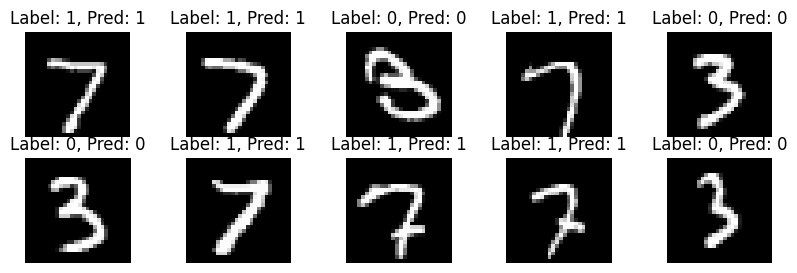

accuracy =  tensor(1.)


In [130]:
# Show some predictions
examples = next(iter(test_loader))
x, y = examples
with torch.no_grad():
    logits = model(x).squeeze(1)
    preds = (torch.sigmoid(logits) > 0.5).long()

plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i].view(28, 28), cmap="gray")
    plt.title(f"Label: {y[i].item()}, Pred: {preds[i].item()}")
    plt.axis("off")
plt.show()

acc = (preds == y).float().mean()
print('accuracy = ', acc)

# Additional Tasks and Assessment

## üéØ Main Track (B‚ÄìD)
- Complete **all blocks** (1‚Äì4) by filling in the TODOs in the code.
- Ensure your code runs and produces the expected **plots and metrics**:
  - Block 1: Manual gradient descent
  - Block 2: PyTorch gradient descent
  - Block 3: Regression with Dataset/DataLoader
  - Block 4: Logistic regression on MNIST (digits 3 vs 7)
- Visualizations and logging must be present.  
- **B‚ÄìD** grades are for correctly completing the main track:
  - **B:** All core tasks complete and correct.
  - **C:** Most core tasks complete, minor errors.
  - **D:** Some core tasks complete, major errors.

---

## üåü Additional Tasks (for grade A)
To earn **grade A**, complete **at least one** of the following additional tasks. You may do more for extra learning.

### **Task 1: Multi-digit Classification**
- Extend MNIST37 dataset to another pair of digits (e.g., 0 vs 1).  
- Train a logistic regression model using Lightning.  
- Log training/validation loss and accuracy.  
- Optional: Visualize a **confusion matrix** of predictions.

### **Task 2: Mini-batch Gradient Descent (Manual)**
- Implement **mini-batch gradient descent** on the toy dataset from Block 1.  
- Compare your loss curve with PyTorch training (Block 2).  
- ‚úÖ Goal: Connect **manual GD and library-powered training**.

### **Task 3: Data Noise Exploration**
- In Block 1 or 3, increase the noise in the target variable `Y`.  
- Observe how gradient descent behaves on noisy data.   

### **Task 4: Visualization Enhancements**
- Add validation step into LogisticRegressionModel()
- Add plots showing **loss vs epochs** for both training and validation (if applicable).  
- Visualize **decision boundary** of logistic regression (optional for 2D projections).  

---

## üìä Assessment Criteria

| Grade | Criteria |
|-------|---------|
| **A** | Successfully completes **at least one additional task** **and** main track completed correctly. |
| **B** | Completes all **main track tasks** correctly (Blocks 1‚Äì4) and plots/logging present. |
| **C** | Completes most main track tasks with minor errors. |
| **D** | Completes some main track tasks; significant errors or missing code. |

---

### üí° Notes
- Include **comments in code** explaining what changes you made for each task.  
- For optional tasks, plots or metrics are strongly encouraged to visualize outcomes.  
- Extra effort beyond A is encouraged, but only one additional task is needed for grade A.

